In [ ]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np
 
# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import sklearn

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# load the csv file
# store the data in 'df_cust'
df_cust = pd.read_csv('../data/UserData.csv')


# display first five observations using head()
df_cust.head()

,Customer_Name,Customer_Type,Gender,Age,guid
0,Stacey Price,Homemaker,F,25,58526ee0-a7c0-480f-a782-2c0c92b3c8ab
1,Michelle Carlson,Professional,F,47,29206584-b0de-4a9f-a228-2ccd7519d732
2,Lisa Graves,Professional,F,34,1200e410-81c6-4604-aff6-9aa124a692a5
3,Mrs. Patricia May,Homemaker,F,44,a1978ec1-8b08-4f03-b9f2-a23317ee6d5e
4,Susan Mitchell,Young Adult,F,22,03a0b807-9cd6-4fff-94a5-25e12548f300


In [4]:
df_cust.shape

(329745, 5)

In [5]:
df_cust.isna().sum()

Customer_Name    0
Customer_Type    0
Gender           0
Age              0
guid             0
dtype: int64

In [6]:
df_cust.dtypes

Customer_Name    object
Customer_Type    object
Gender           object
Age               int64
guid             object
dtype: object

In [7]:
df_cust.drop(['Customer_Name','guid'],axis=1,inplace=True)

In [8]:
df_cust.describe()

,Age
count,329745.000000
mean,40.350465
std,22.078173
min,5.000000
25%,19.000000
50%,40.000000
75%,60.000000
max,80.000000


In [9]:
df_cust['Gender'].value_counts()

Gender
F    197347
M    132398
Name: count, dtype: int64

In [10]:
df_cust['Customer_Type'].value_counts()

Customer_Type
Teenager          41395
Homemaker         41390
Senior Citizen    41341
Professional      41294
Young Adult       41186
Student           41150
Middle-Aged       41014
Retiree           40975
Name: count, dtype: int64

In [12]:
df_cust_num = df_cust.select_dtypes(np.number)
df_cust_cat = df_cust.select_dtypes('object')

In [13]:
df_cust_cat

,Customer_Type,Gender
0,Homemaker,F
1,Professional,F
2,Professional,F
3,Homemaker,F
4,Young Adult,F
...,...,...
329740,Student,M
329741,Retiree,M
329742,Middle-Aged,M
329743,Young Adult,M


In [15]:
X_norm = StandardScaler()

# normalize all the columns of the dataframe 'X_filtered'
num_norm = X_norm.fit_transform(df_cust_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = df_cust_num.columns)

X.head()

,Age
0,-0.695279
1,0.301182
2,-0.287636
3,0.165301
4,-0.831160


In [16]:
df_cust_final = pd.get_dummies(df_cust_cat,drop_first=True)

In [17]:
df_cust_final['Age'] = num_norm

In [18]:
df_cust_final.head()

,Customer_Type_Middle-Aged,Customer_Type_Professional,Customer_Type_Retiree,Customer_Type_Senior Citizen,Customer_Type_Student,Customer_Type_Teenager,Customer_Type_Young Adult,Gender_M,Age
0,False,False,False,False,False,False,False,False,-0.695279
1,False,True,False,False,False,False,False,False,0.301182
2,False,True,False,False,False,False,False,False,-0.287636
3,False,False,False,False,False,False,False,False,0.165301
4,False,False,False,False,False,False,True,False,-0.831160


In [19]:
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_cust_final)
    wcss.append(kmeans.inertia_)

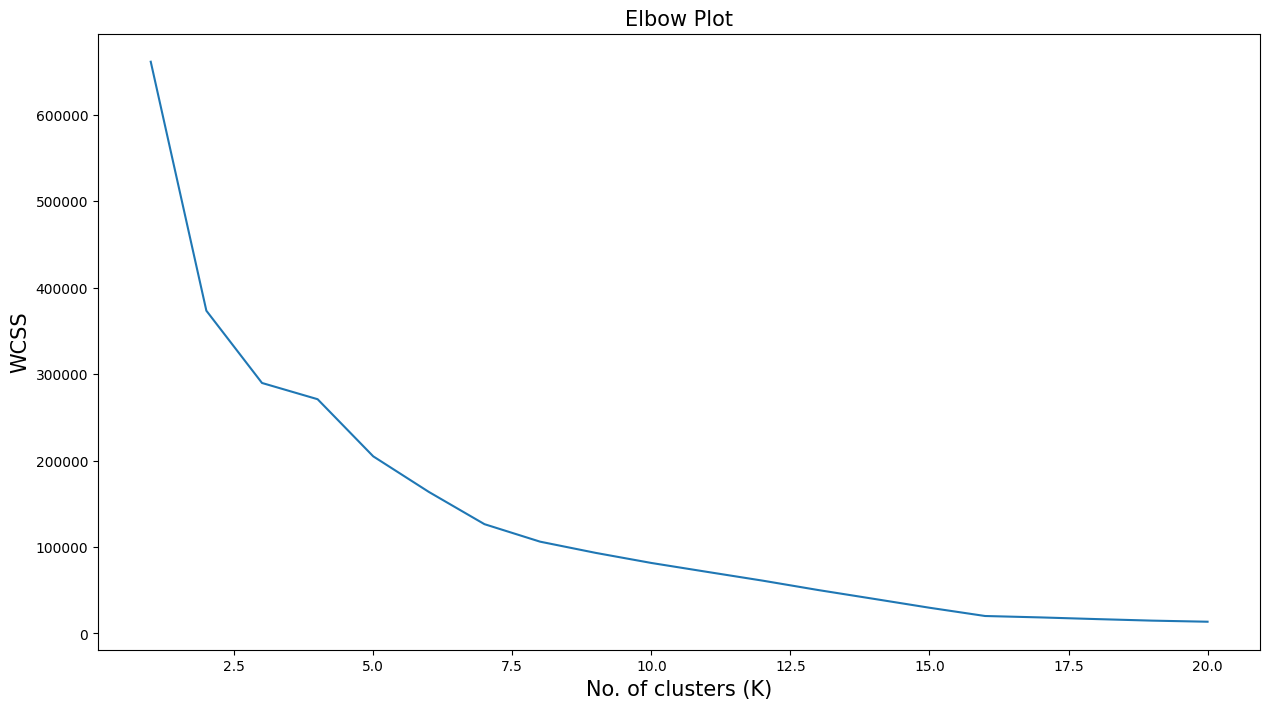

In [20]:
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

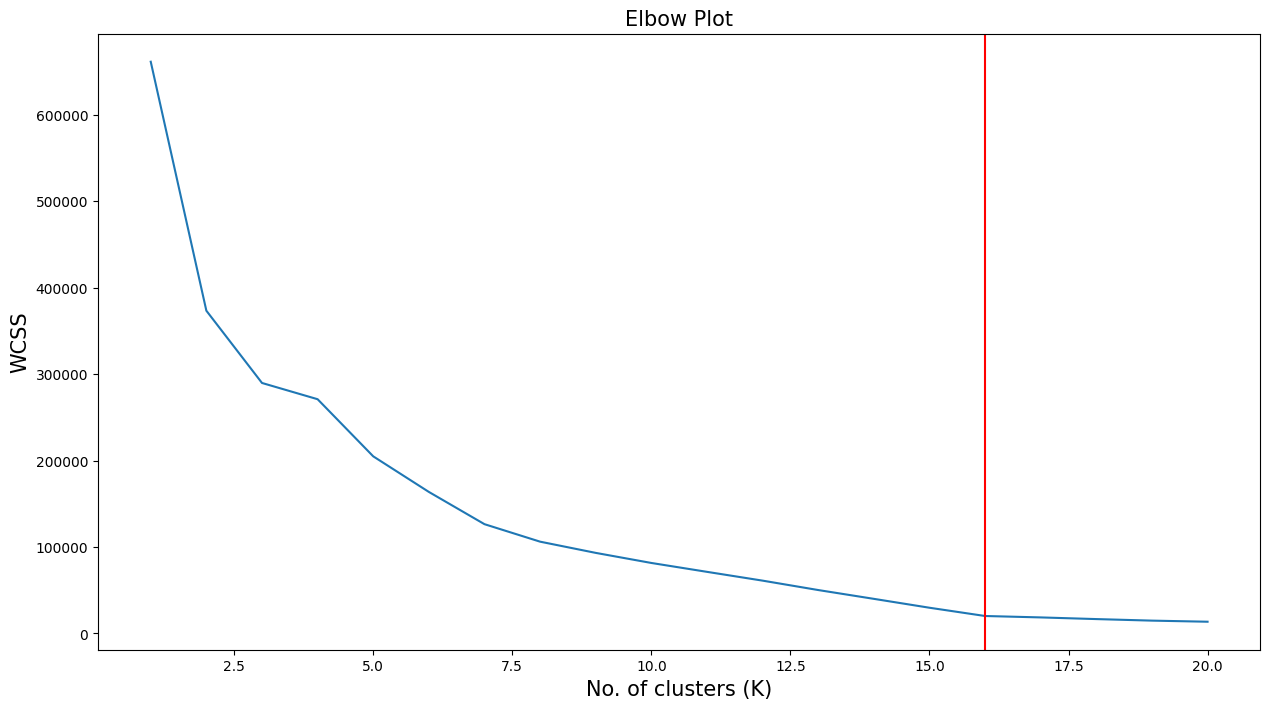

In [32]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 16, color = 'red')

# display the plot
plt.show()

In [21]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_cust_final[:20000])
    score = silhouette_score(df_cust_final[:20000], predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.3739503888522184)
For 3 clusters the silhouette score is 0.2924173902124102)
For 4 clusters the silhouette score is 0.3223853429716163)
For 5 clusters the silhouette score is 0.356077024509398)
For 6 clusters the silhouette score is 0.36112546486234337)
For 7 clusters the silhouette score is 0.496033406853414)
For 8 clusters the silhouette score is 0.5496058669159908)
For 9 clusters the silhouette score is 0.5672111246066208)
For 10 clusters the silhouette score is 0.5640348014871651)
For 11 clusters the silhouette score is 0.60187741622667)
For 12 clusters the silhouette score is 0.6269744661776101)
For 13 clusters the silhouette score is 0.6451091004794952)
For 14 clusters the silhouette score is 0.6761212709551839)
For 15 clusters the silhouette score is 0.6990296547715451)
For 16 clusters the silhouette score is 0.7339222431585742)
For 17 clusters the silhouette score is 0.7314766512688236)
For 18 clusters the silhouette score is 0.728144993

In [22]:
cluster = KMeans (n_clusters= 16, random_state= 10)
predict = cluster.fit(df_cust_final)

In [23]:
cluster.predict(pd.DataFrame(data=[[False, False, True, False, False, False, False, False, 0.900079]],columns=df_cust_final.columns))

array([11])

In [24]:
type(cluster)

sklearn.cluster._kmeans.KMeans

In [25]:
import pickle

In [37]:
with open("../models/kmeans_model.pkl", "wb") as f:
    pickle.dump(cluster, f)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from mytools import colmnSelector

ModuleNotFoundError: No module named 'mytools'

In [27]:
num_features = df_cust.select_dtypes(np.number).columns
cat_features = df_cust.select_dtypes('object').columns

In [28]:
# Define transformers for preprocessing
num_transformer = ("scaler", StandardScaler())
cat_transformer = ("encoder", OneHotEncoder(drop="first",handle_unknown='ignore'))
#OneHotEncoder(handle_unknown='ignore')

In [29]:
preprocessor = ColumnTransformer([
    ("column_selector", ColumnSelector(columns=["Customer_Type", "Gender", "Age"])),
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

NameError: name 'ColumnSelector' is not defined

In [94]:
df_cust.columns

Index(['Customer_Name', 'Customer_Type', 'Gender', 'Age', 'guid'], dtype='object')

In [87]:
sklearn.set_config(enable_metadata_routing=True)

In [14]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', KMeans(n_clusters=16, random_state= 10))  # ML model (RandomForest)
])

In [15]:
from sklearn import set_config
set_config(display="diagram")

In [16]:
pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('column_selector', ...), ('num', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
df_cust1 = df_cust.drop(['Customer_Name','guid'],axis=1)

In [48]:
preprocessor.fit(df_cust)

ValueError: not enough values to unpack (expected 3, got 2)

In [54]:
pipeline.fit(df_cust)

ValueError: not enough values to unpack (expected 3, got 2)

In [62]:
df_cust.columns

Index(['Customer_Name', 'Customer_Type', 'Gender', 'Age', 'guid'], dtype='object')

In [18]:
import joblib
from userClusteringPipeline import ColumnSelector

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns  # Can be list of names or indices

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

In [23]:

# ------------------------------
# ✅ Pipeline Components

# Step 1: Select only 3 columns
column_selector = ColumnSelector(columns=["Customer_Type", "Gender", "Age"])

# Step 2: Define column-wise transformers
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), ["Age"]),
    ("cat", OneHotEncoder(drop="first"), ["Customer_Type", "Gender"])
])

# Step 3: KMeans Clustering
kmeans = KMeans(n_clusters=16, random_state=42)

# Step 4: Full Pipeline
pipeline1 = Pipeline(steps=[
    ("select_columns", column_selector),
    ("preprocessing", preprocessor),
    ("clustering", kmeans)
])

# ------------------------------
# 🔍 Fit pipeline to data
pipeline1.fit(df_cust)

# Predict clusters
labels = pipeline1.predict(df_cust[:5])
print("Cluster labels:", labels)

Cluster labels: [ 9  5  5 12  1]


In [26]:
pipeline1.predict(df_cust[0:9])

array([ 9,  5,  5, 12,  1, 11,  6,  1, 12])

In [30]:
pipeline1.predict(df_cust.loc[[0]])

array([9])

In [25]:
joblib.dump(pipeline1,'../models/KMeans_pipeline.pkl')

['../models/KMeans_pipeline.pkl']